## Mistral API :
 
 - For Mistral Models , Free Trial available after Phone number verification.
 - <a href="https://console.mistral.ai/api-keys/">API</a>
 - <a href="https://huggingface.co/mistral-community/pixtral-12b-240910">Pixtral on HuggingFace</a>

In [1]:
Mistral_API_Key = "SwVFQxyalAcijWWJ1kUqAJSoBcIhUjuy"

In [3]:
from langchain_mistralai import ChatMistralAI

llm = ChatMistralAI(
    mistral_api_key= Mistral_API_Key,
    model="mistral-small-2402",
    temperature=0,
    max_retries=2,
    # other params...
)

In [10]:
messages = [
    (
        "system",
        "You are a helpful math assistent",
    ),
    ("human", "The diravative of In(x) + 1/x is:"),
]
ai_msg = llm.invoke(messages)
print(ai_msg.content)

The derivative of the function In(x) + 1/x is:

d/dx [In(x)] + d/dx [1/x]

The derivative of In(x) is 1/x and the derivative of 1/x is -1/x^2.

So, the derivative of In(x) + 1/x is 1/x - 1/x^2.


In [11]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Ich liebe das Programmieren.', response_metadata={'token_usage': {'prompt_tokens': 21, 'total_tokens': 29, 'completion_tokens': 8}, 'model': 'mistral-small-2402', 'finish_reason': 'stop'}, id='run-75660f1a-cba0-4c7e-9046-b9dcba595c1e-0', usage_metadata={'input_tokens': 21, 'output_tokens': 8, 'total_tokens': 29})

## Solar Pro (Preview)

- The most intelligent LLM model running in one GPU
- Size : 22b
- Free API access until Officiel realese on November.
- Open source
- Available on HuggingFace but need at least a 50 GB in VRAM.
- <a href="https://huggingface.co/upstage/solar-pro-preview-instruct">HuggingFace</a>
- <a href="https://python.langchain.com/v0.2/docs/integrations/chat/upstage/">Langchain</a>
- <a href="https://www.upstage.ai/pricing">Pricing</a>
- <a href="https://www.upstage.ai/products/solar-pro-preview">Release</a>
- <a href="https://console.upstage.ai/home">API</a>

- Benchmarking :

<img src="https://images.squarespace-cdn.com/content/v1/659384103b38c97cdaf368bd/7a828b3b-8d39-4505-8d27-13b1c086f9be/solar_pro_preview_table.png?format=1500w">

In [ ]:
UPSTAGE_API_KEY = "up_WZHQQeeNIBpUcQIcIGT3iSqKttDVo"

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_upstage import ChatUpstage

chat = ChatUpstage(api_key=UPSTAGE_API_KEY, model="solar-pro")

In [ ]:
# using chat invoke
chat.invoke("What is your creator name?")

AIMessage(content='My creator is Upstage, an AI company known for its innovative AI solutions.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 17, 'total_tokens': 38, 'completion_tokens_details': None}, 'model_name': 'solar-pro-preview-240910', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-8f86252d-5758-41d9-aa58-a105cfd51ca4-0', usage_metadata={'input_tokens': 17, 'output_tokens': 21, 'total_tokens': 38})

In [ ]:
# using chain
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant that translates English to French."),
        ("human", "Translate this sentence from English to French. {english_text}."),
    ]
)
chain = prompt | chat

chain.invoke({"english_text": "I am going to the store."})

AIMessage(content='Je vais au magasin.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 44, 'total_tokens': 53, 'completion_tokens_details': None}, 'model_name': 'solar-pro-preview-240910', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-c7708773-07d7-4e9d-81f8-74f193877037-0', usage_metadata={'input_tokens': 44, 'output_tokens': 9, 'total_tokens': 53})

## GOT OCR 2.0 :
- A powerful OCR model for all your OCR needs.
- <a href="https://huggingface.co/ucaslcl/GOT-OCR2_0">HuggingFace</a>

## 4.GitHub Models :

- Service of Github for AI models
- Playground,Multiple Providers , Code intergration(Python , javascript , C#) with GitHub API. (Free API Key)
- <a href="https://github.com/marketplace">Link</a>
- <a href="https://docs.github.com/en/github-models/prototyping-with-ai-models#rate-limits">Free API Limits</a>
- Test and Try multiple models quickly with `Playground`, This feature not Available in HuggingFace or Ollama for example !!
- Just for Prototyping AI applications for go beyond the Limits we need to buy an API key from `Azure services` or `OpenAI`, No code change.

## Contextuel RAG :

<p style="color:#ffde21;">Why ?</p>

- The problem with Traditional RAG is that it is not accurate in many cases, one of the the causes is the Low quality of the retrived Content.

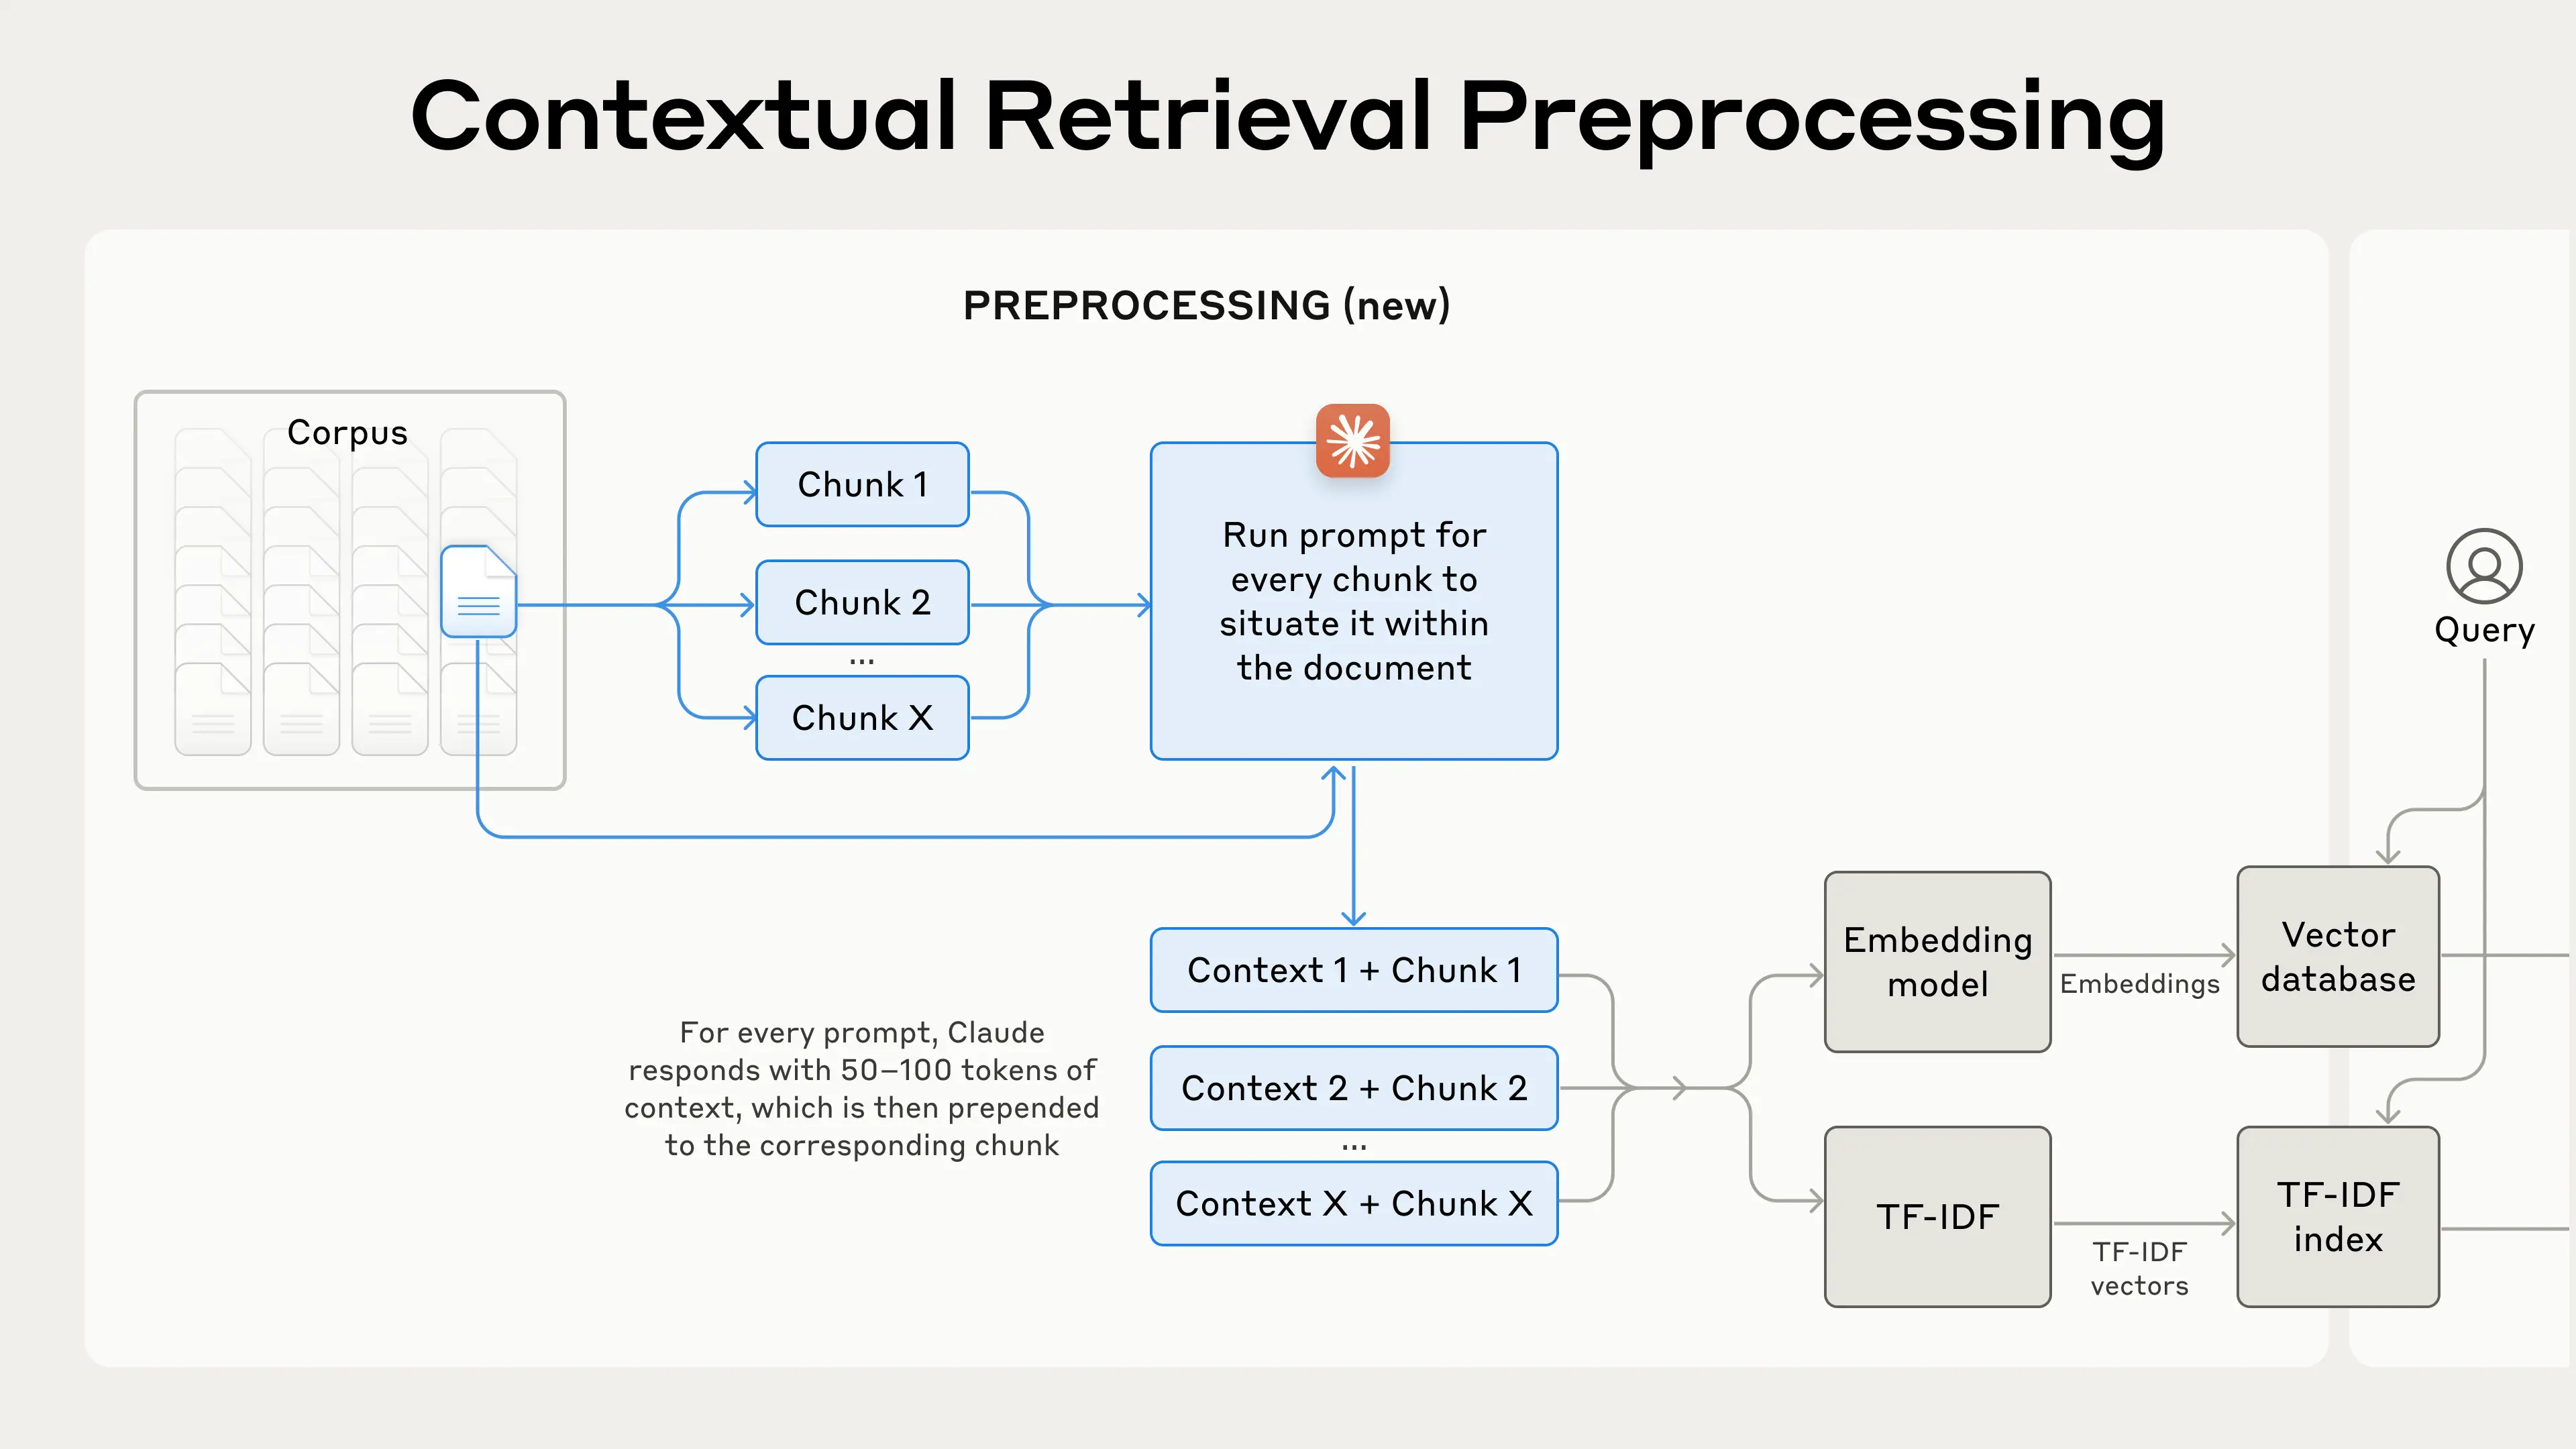

<p style="color:#ffde21;">Advantage</p>

- The idea (Anthropic Idea) is to Enhance Chunks quality and meaning, by Adding Context to each Chunk.

**for exemple :**

**original_chunk** = "The company's revenue grew by 3% over the previous quarter."

**contextualized_chunk = Context + Chunk** = "This chunk is from an SEC filing on ACME corp's performance in Q2 2023; the previous quarter's revenue was $314 million. The company's revenue grew by 3% over the previous quarter."

<p style="color:#ffde21;">The Probleme</p>

- The Probleme is with Cost, because for each Chunk we need to send the Whole Document with the Chunk to the LLM to generate the New Chunk.

- To reduce the cost we can use  Prompt Caching to cache the Document tokens so we don't need to send it to the LLM every chunk.

- **Gemini Embedding model**: is the best as Anthropic said.

- <a href="https://www.anthropic.com/news/contextual-retrieval">More Details</a>


## BM25 Search :

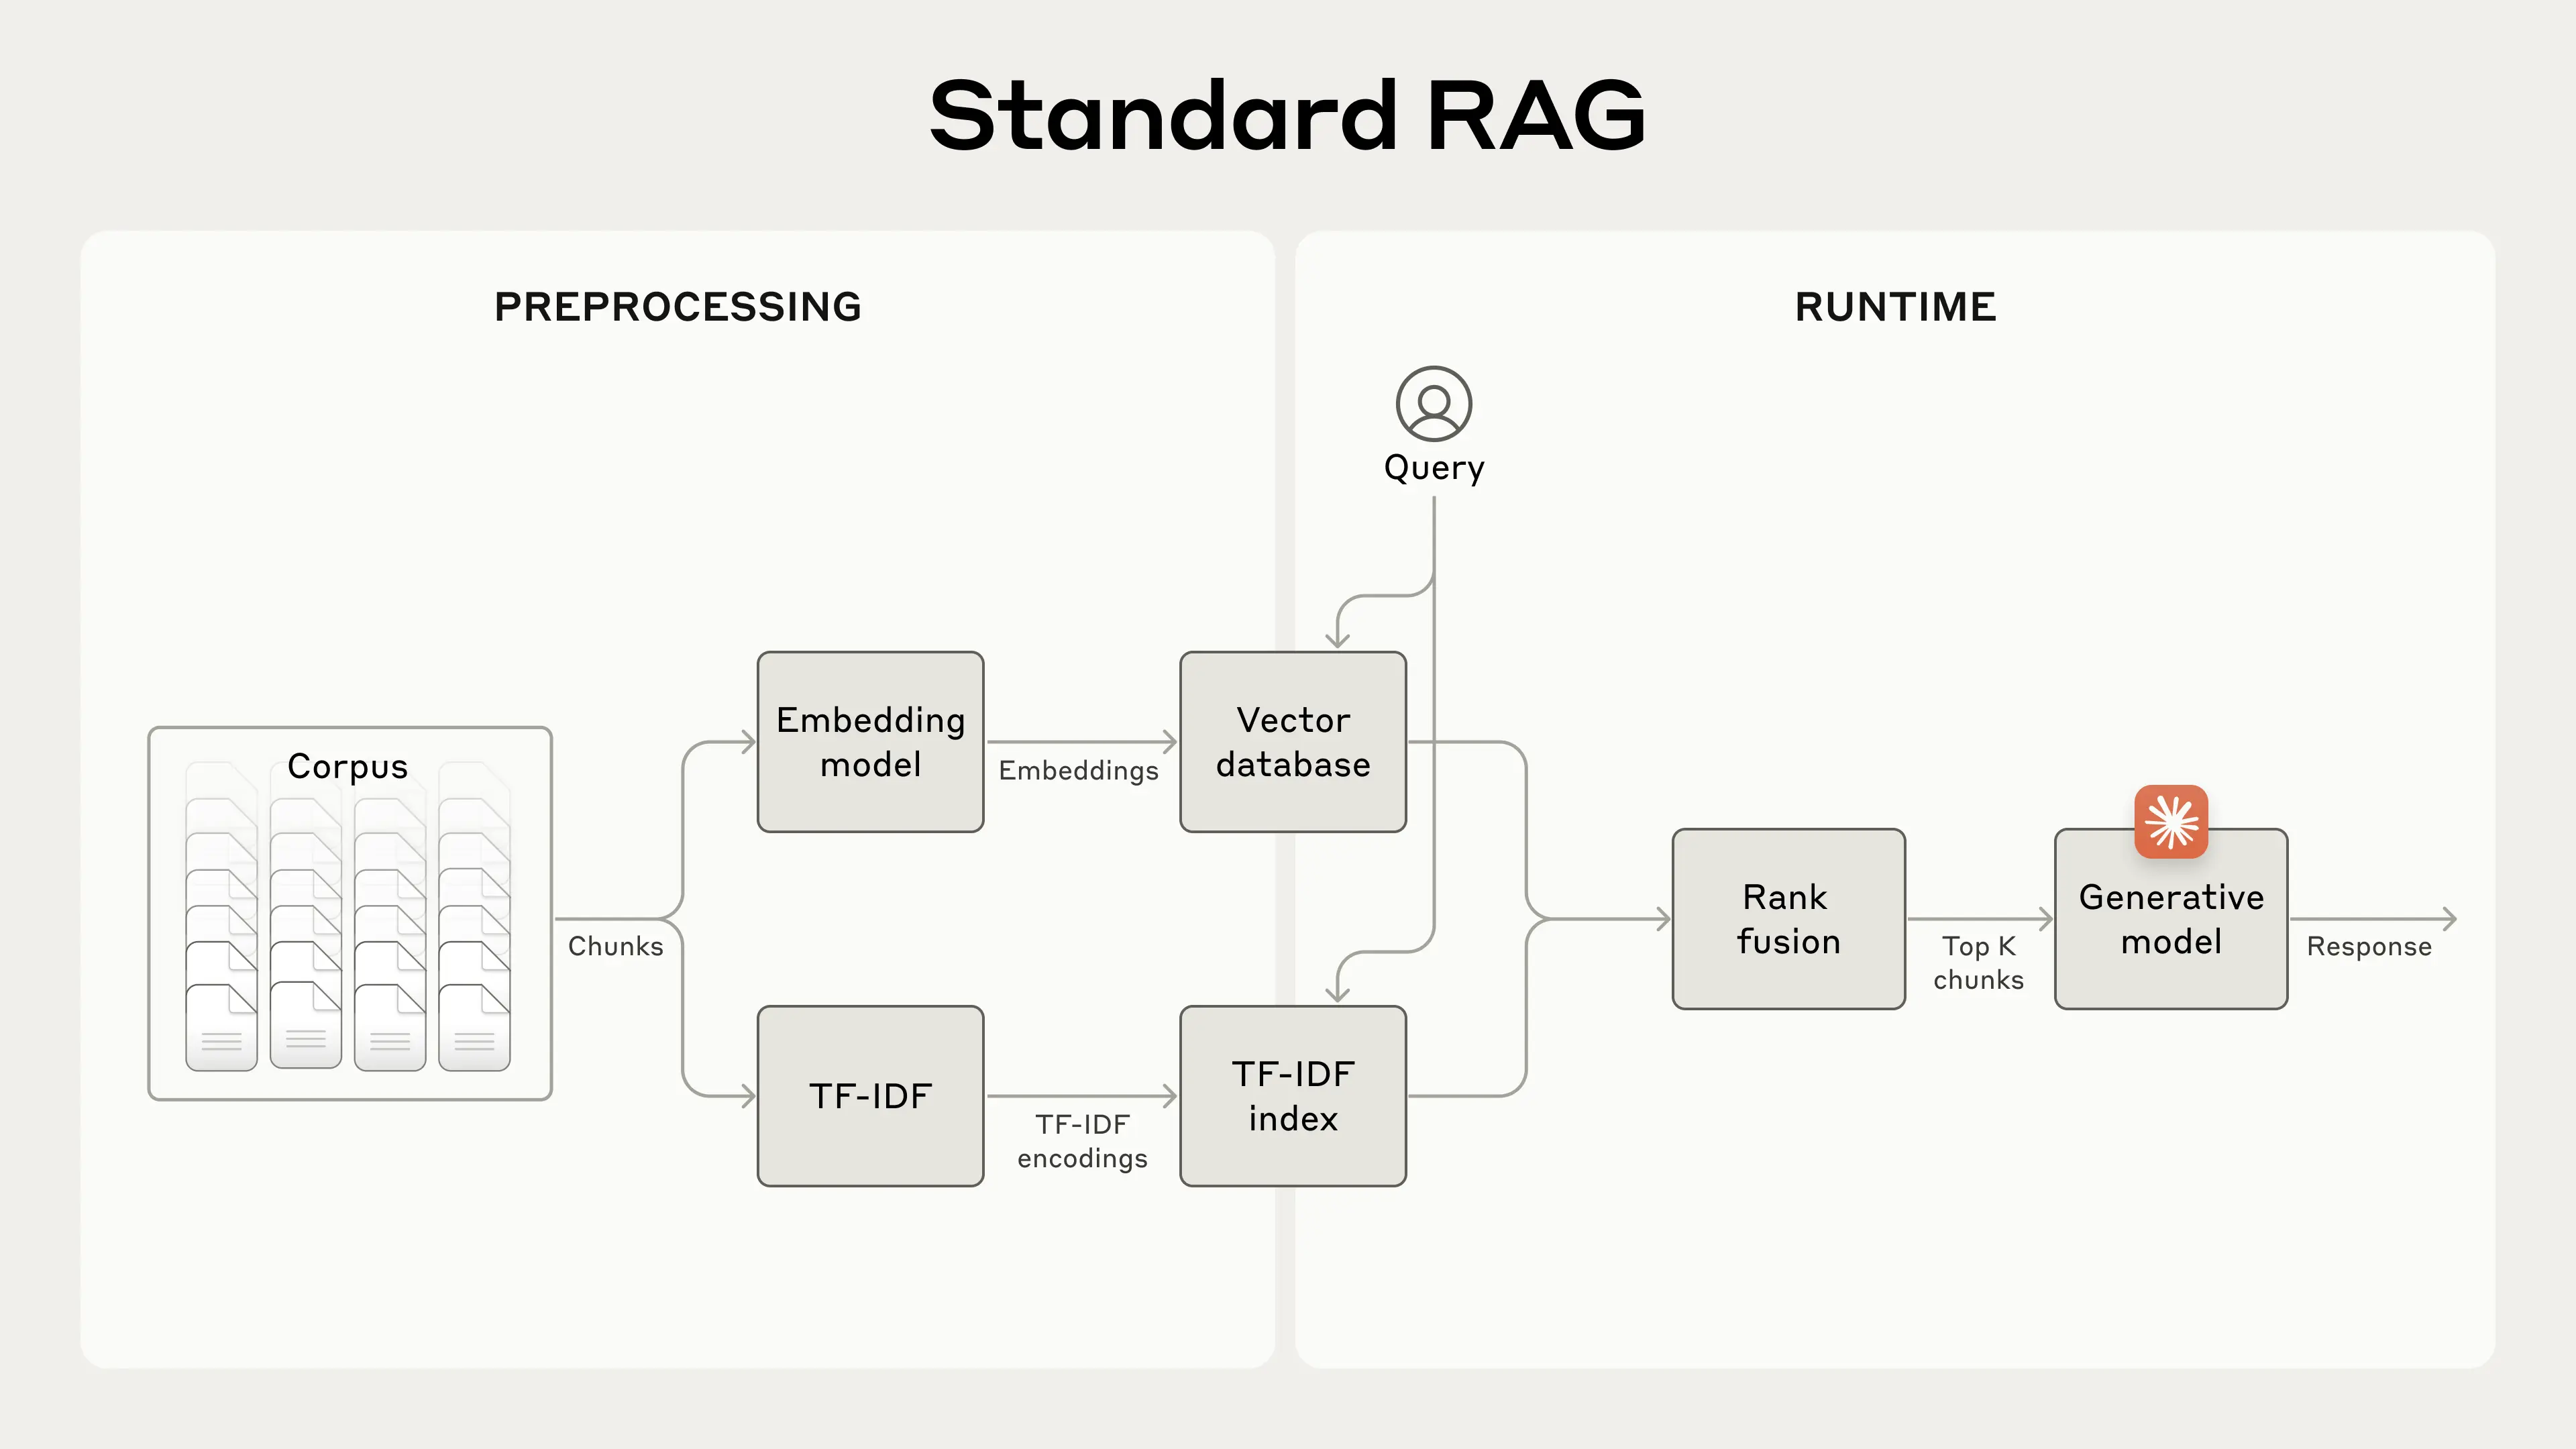

- It's a keyword matching technique , used as a Retriver in RAG pipelines.

## Best RAG Pipeline :


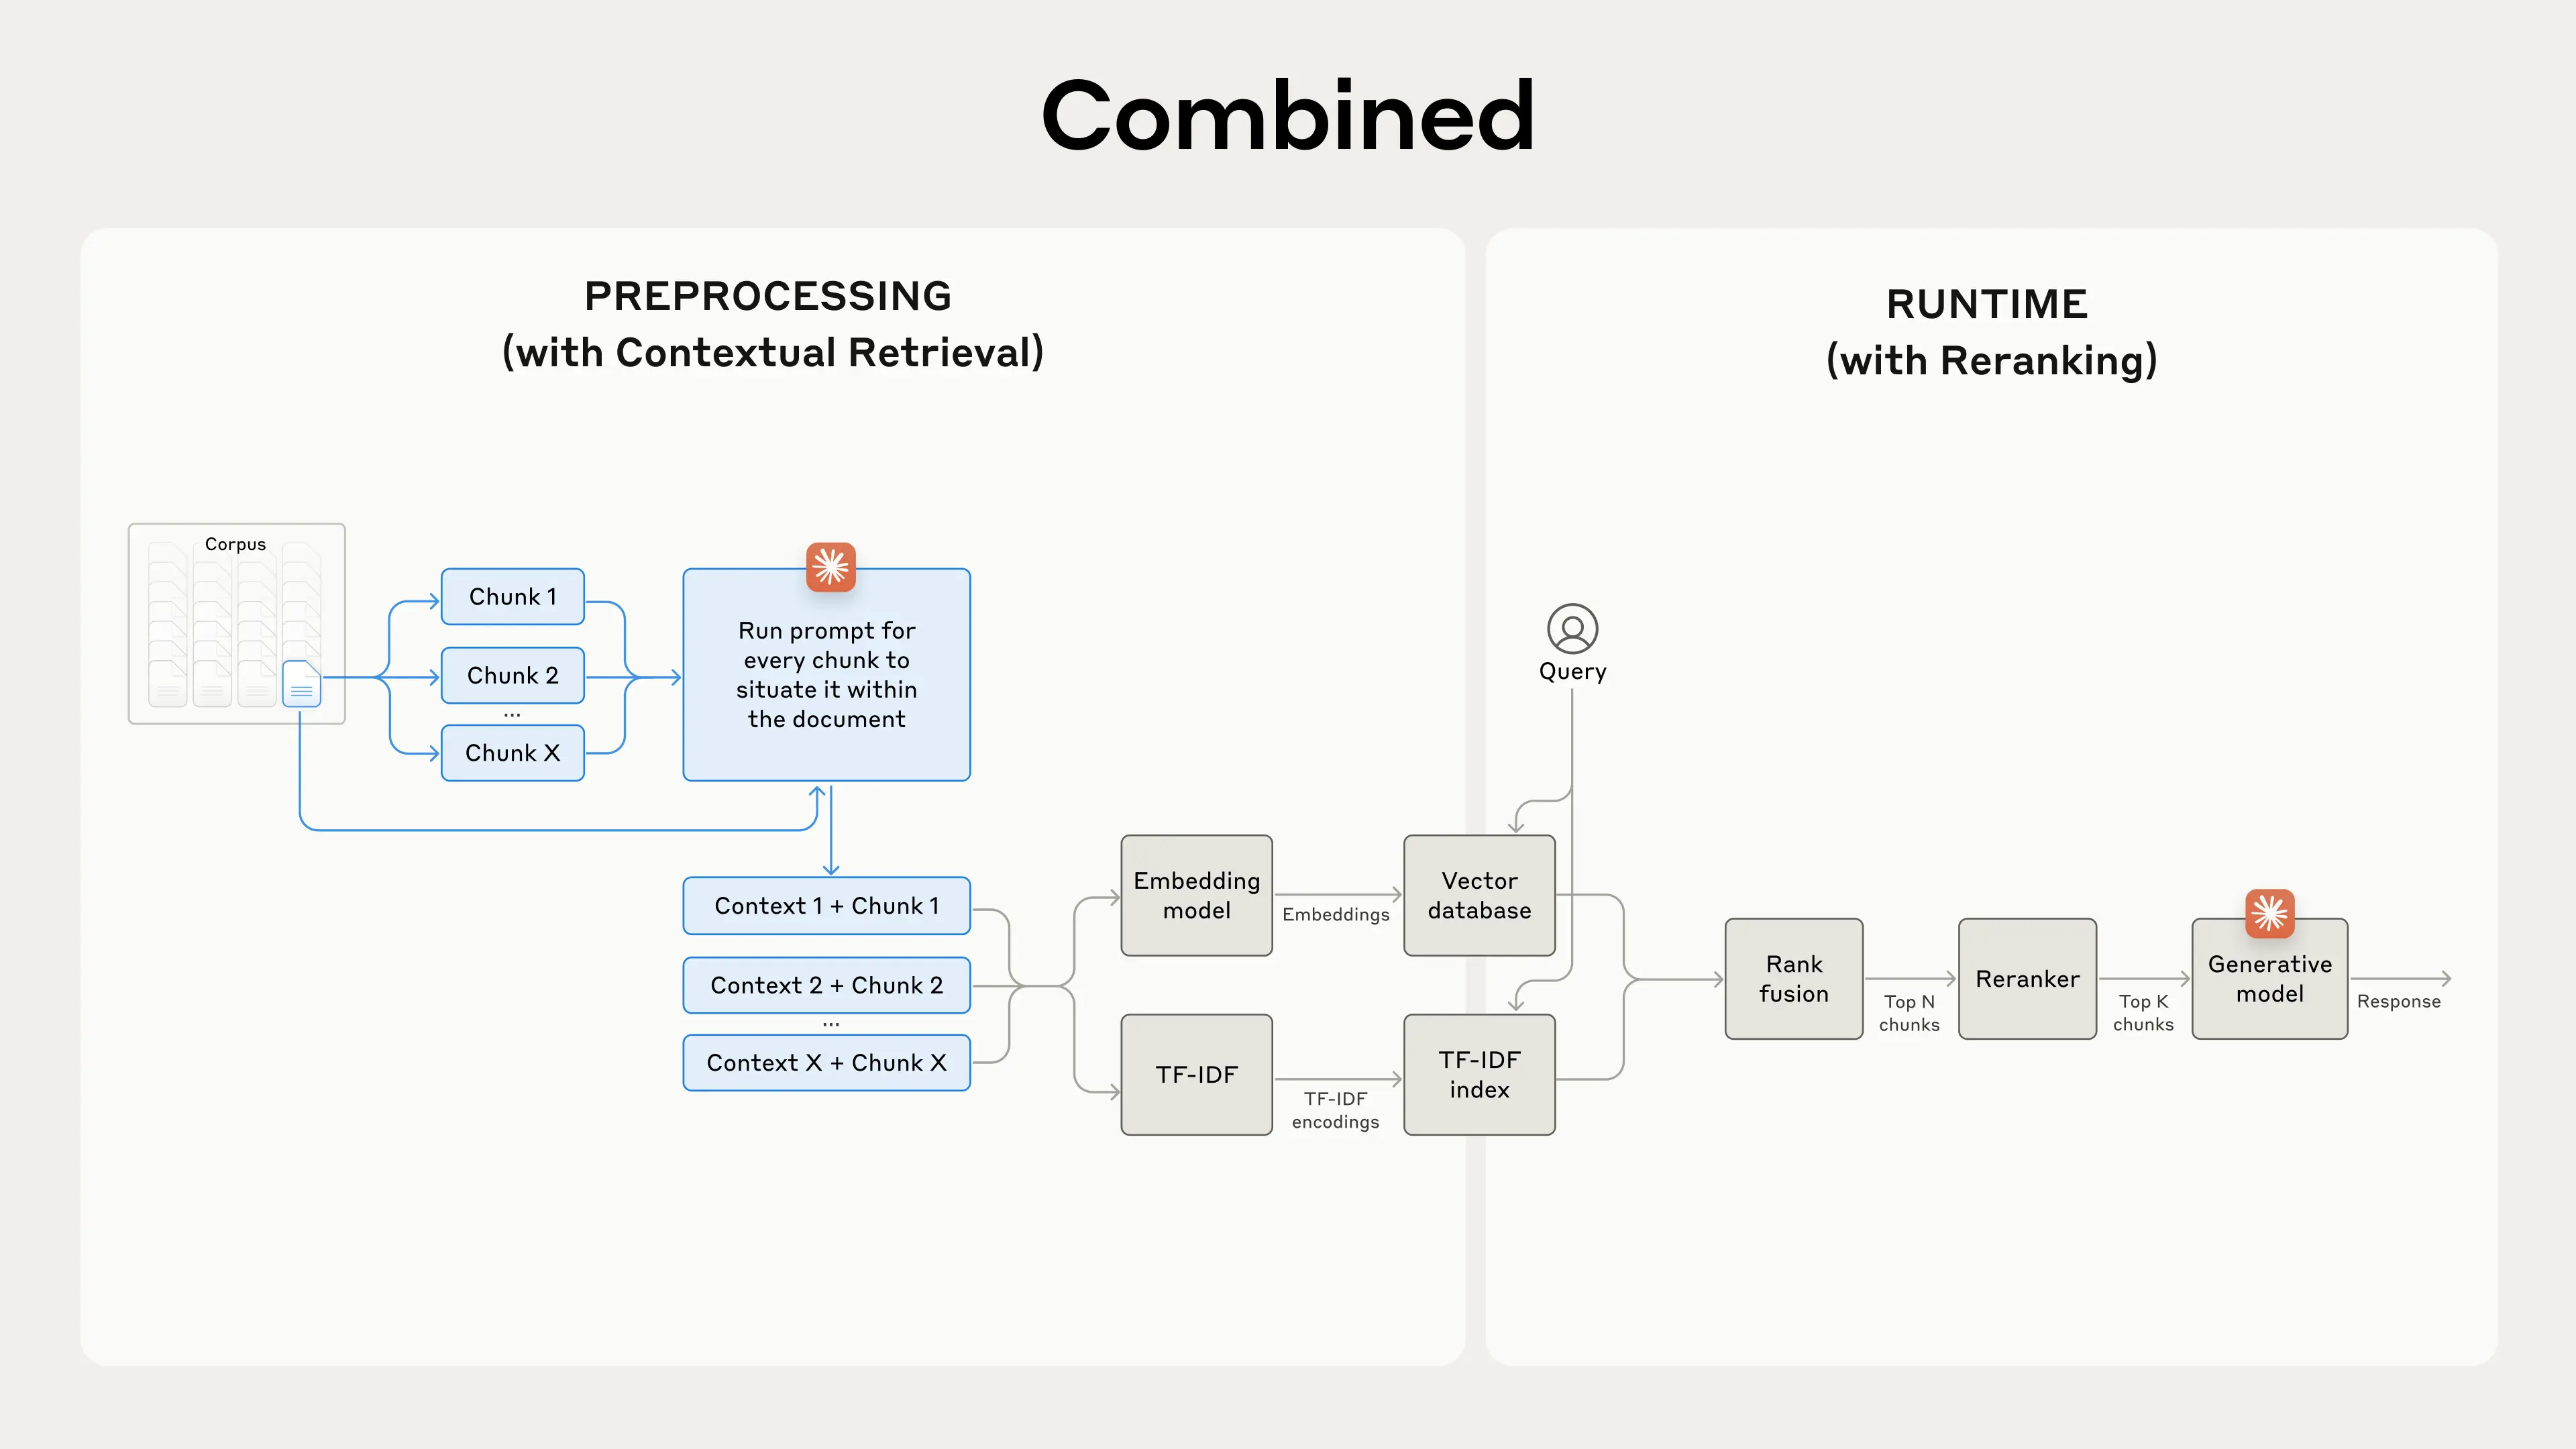

- One important consideration with reranking is the impact on latency and cost, especially when reranking a large number of chunks. Because reranking adds an extra step at runtime, it inevitably adds a small amount of latency, even though the reranker scores all the chunks in parallel. There is an inherent trade-off between reranking more chunks for better performance vs. reranking fewer for lower latency and cost. We recommend experimenting with different settings on your specific use case to find the right balance.



## Molmo VLM :

- A Game Changer VLM , that perform Counting, Extracting, Tasks better than any auther VLM even GPT4, a unique Architecture (CLIP + OCR +...)

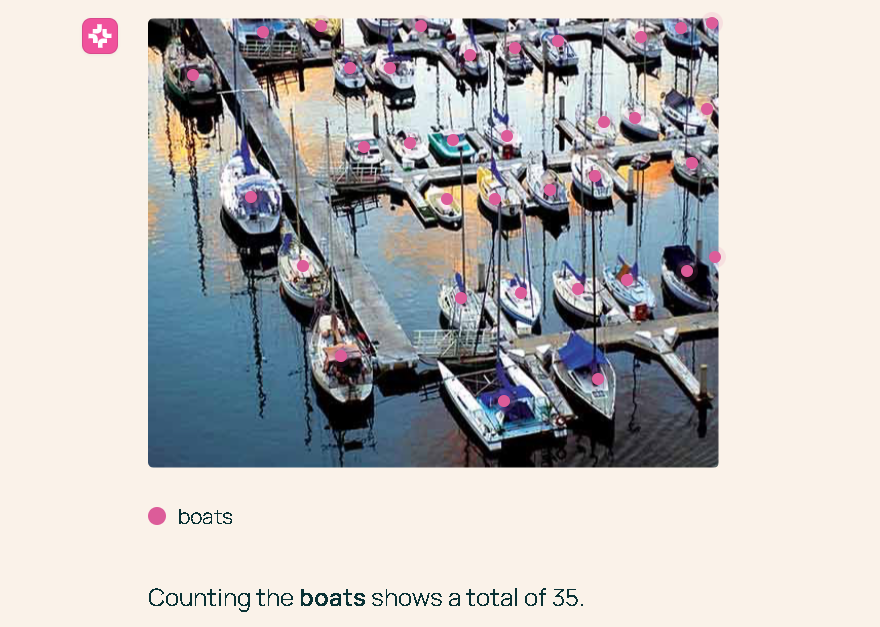

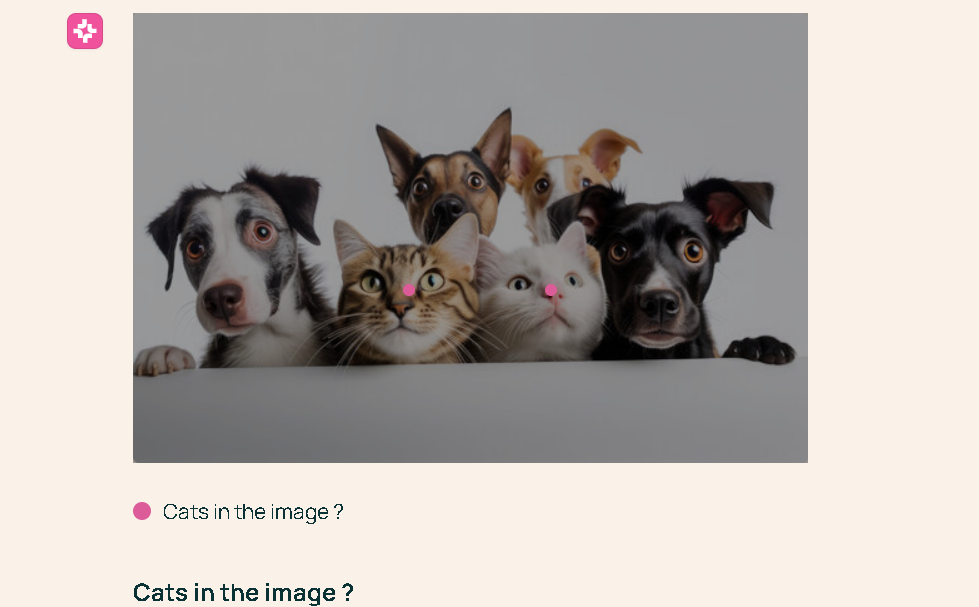

- It's like a Prompt segmentation model like SAM2 of Meta, but instead of segmenting Objects , he Points on them

- The model Weights are available on <a href="https://huggingface.co/allenai">HuggingFace</a>.

- <a href="https://molmo.allenai.org/share/0aa44b2b-9ac6-40ef-874d-3dc95ed611fa">Try it</a>

## FireCrawl


- A good Web Scraping API, Stand out from Outhers, with capacity to Response with a **Clean** Markdown Format with all tiles links, Images...
- <a href="https://www.firecrawl.dev/app?authSuccess=true&?status=Success!&status_description=You%20are%20now%20signed%20in.">Try it</a>
- Integrated with Langchain.

## 10.Langraph Cross-thread memory :

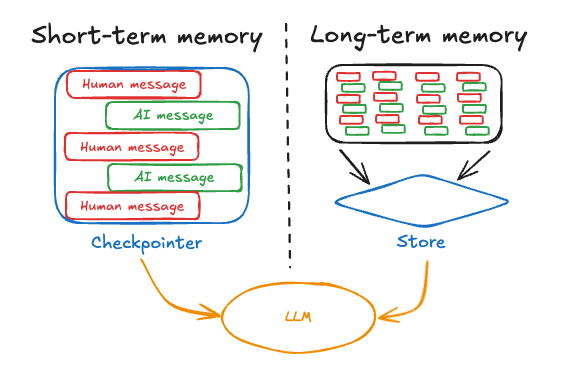

- Langraph already provide a `Short-term memory` by the Checkpointing, but with this method the Agent just remember the Current Conversation (Thread).
- To outcome this limit Langraph just add a `Long-term memory`, so the Agent can Remember all previous Conversations.

<p style="color:#ffde21; font-weight: bold">How it works ?</p>

- The mechanism is based on a Document Store.
- The Store Countaine the Namespaces one for each User.
- The Namespace contains all previous memories of the User.

<p style="color:#ffde21; font-weight: bold">Features</p>

- **NameSpaces** : We can save each User's memory in a different namespace.
- **JSON Document Storage**: Save memories as JSON documents for easy manipulation and retrieval.

In [ ]:
%pip install -U langchain_openai langgraph

In [2]:
from langgraph.store.memory import InMemoryStore

in_memory_store = InMemoryStore()

## 11.Late Chunking :

<img src="./Images/11_Image1.png" alt="image.png" width="500" height="400"/>

- Is a technique to solve Context losing problem in Standard RAG Pipeline.The idea is to embed the whole Document then Chunk it, so every token embedding well countain meanings of the Whole Context ==> Better Embeddings.

<p style="color:#ffde21; font-weight: bold">Why this is useful ?</p>

For example, if the user query is : "What is the population of Berlin?"

| **Chunk**                    | **Similarity Score Naive Chunking**                        | **Similarity Score Late Chunking**               |
|-------------------------------|--------------------------------------------------|--------------------------------------------------|
|The Berlin City is the Capital of Germany.|0.85 | 0.85|
|The City Population is 3.5 million in 2020 **(From a Document about Berlin)**|0.75 | 0.83|
|The City Population is 4 million in 2020 **(From a Document about Paris)** |0.75 | 0.6|
|The City Population is 7 million in 2020 **(From a Document about Napoli)** |0.75 | 0.5|
|it's the third smallest state in the country in terms of area. | 0.73 | 0.82 |

- Late Chunking generates better similarity scores because the embedding of the 2nd and 3rd chunk will countain the meaning of the world "Berlin".
- If we fix the Number of Retrived Chunks, to 3.
  - Standard Retriver will return the 3 first Chunks leading to Confuse the LLM.(3.5 million or 4 million)
  - But With Late Chunking, the Retriver will return the 2 1st 2nd and last chunk so Good response from the LLM.

<p style="color:#ffde21; font-weight: bold">More Details</p>

<img src="./Images/11_Image2.png" alt="image.png" width="700" height="400"/>

- As Your Document is very long,as the Improuvement pourcentage is high
- This approach is need on the Long Context window Embedding model.

<a href="https://jina.ai/news/late-chunking-in-long-context-embedding-models/">More Details</a>
